In [75]:
# tryng my own model with numpy 
# might try keras later
import numpy as np
import pandas as pd
from math import e, inf, sqrt
import random
from PIL import Image
import matplotlib.pyplot as plt

# activation 
def sig(x):
    y = 1/(1 + np.exp(-x))
    return y

# activation gradient
def sigDeriv(x):
    y = sig(x)*(1-sig(x))
    return y
x = np.array([1,2,3])
sigDeriv(x)



array([0.19661193, 0.10499359, 0.04517666])

In [76]:
dat = pd.read_csv("handwritten digits (images).csv",dtype=int)
numOfDatasets = len(dat)
dat = dat.sample(frac=1).reset_index(inplace=False, drop=True)
dat

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:

TrainingData = pd.DataFrame(dat.iloc[:, 1:]).to_numpy(copy=True, dtype=np.int32)

# normalise data (make mean 0 and std 1)
mean = np.mean(TrainingData)
std = np.std(TrainingData)
TrainingData = (TrainingData - mean)/std
sum(TrainingData[0,:])

123.64887034679117

correct ans: 9


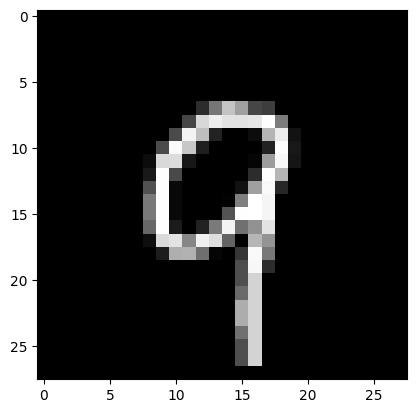

In [78]:
# used to test later 
def DataColToImage(x):
    image = Image.fromarray(TrainingData[x, :].reshape(28,28)* std + mean)
    plt.imshow(image)
    print("correct ans:", dat.iloc[x, 0])
DataColToImage(random.randint(0,42000))

In [79]:
TrainingData[1, :].shape

(784,)

In [80]:
# separate training and test data by indexes 
testNum = 6000
allIndex = list(range(0,42000))
trainIndex = []
for i in range(0, 42000 - testNum):
    x = random.randint(0, len(allIndex) - 1)
    trainIndex.append(allIndex[x])
    allIndex.pop(x)
testIndex = allIndex
print(len(testIndex))

6000


In [81]:
x = np.array([[1,2,3],
              [1,2,3]])

y = np.array([[1,2,3]])

y.shape

(1, 3)

In [82]:
inputNumber = 784
Hidden1NeuronCount = 70
Hidden2NeuronCount = 90 
outputCount = 10
learningRate = 0.1

# all weights from each row will lead to same neuron of the next layer 
# all weights from same column will act on same neuron of current layer
# first row weights are all weights that lead to first neuron in the next layer, etc
# first column weights are all weights that act on first neuron of current layer 
# weight.T = [all weights that act on first neuron of current layer]
#          [all weights that act on second neuron of current layer], etc...
# weight = [all weights that lead to first neuron of next layer]
#            [all weights that lead to second neuron of next layer], etc... 
# data will be a single column
# next layer calculated will be single column with all neurons (good)
# h,g,f,H,G,F == inactivated and activated hidden layers and final layers respectively

weights1 = np.random.uniform(-0.5,0.5,(Hidden1NeuronCount, inputNumber))
weights2 = np.random.uniform(-0.5,0.5,(Hidden2NeuronCount, Hidden1NeuronCount))
weights3 = np.random.uniform(-0.5,0.5,(outputCount, Hidden2NeuronCount))

biases1 = np.random.uniform(-0.1,0.1,(Hidden1NeuronCount, 1))
biases2 = np.random.uniform(-0.2,0.2,(Hidden2NeuronCount, 1))
biases3 = np.random.uniform(-0.3,0.3,(outputCount,1))

print(weights1.shape, weights2.shape, weights3.shape)
sig(weights1)

(70, 784) (90, 70) (10, 90)


array([[0.4886488 , 0.62001137, 0.39264087, ..., 0.47985887, 0.5806129 ,
        0.59130164],
       [0.61810349, 0.43425962, 0.523918  , ..., 0.62117341, 0.44350608,
        0.52838844],
       [0.39273742, 0.38876736, 0.50235112, ..., 0.43668837, 0.55796745,
        0.58141428],
       ...,
       [0.56091901, 0.51988579, 0.58920483, ..., 0.62150175, 0.46481233,
        0.53388011],
       [0.61397898, 0.57127194, 0.61552088, ..., 0.58430968, 0.43882959,
        0.3881787 ],
       [0.60478964, 0.60041261, 0.39889671, ..., 0.38600745, 0.5180302 ,
        0.47701603]])

In [83]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

def test():
    # single test
    randomTest = testIndex[random.randint(0, testNum-1)] # only uses testdata for testing dont use data that will be iused in raining 
    prams = forwardProp(randomTest, weights1, weights2, weights3, biases1, biases2, biases3)
    modelAns, hidden1, hidden2, finallayer, UnactivatedHidden1, UnativatedHidden2, UnactivatedFinalLayer, data = prams
    ans = finallayer
    cost = np.sum((modelAns - finallayer)**2)
    DataColToImage(randomTest)
    print("predicted:", ans.argmax())
    return ans

def testMany():
    # test a bunch for accuracy calculations 
    correct = 0
    wrong = 0
    for i in range(0, testNum):
        singleTest = testIndex[i] # only uses testdata for testing dont use data that will be used in training
        finallayer = forwardProp(singleTest, weights1, weights2, weights3, biases1, biases2, biases3)[3]
        ans = softmax(finallayer)
        pred = ans.argmax()
        corr = int(dat.iloc[singleTest, 0])
        if pred == corr:
            correct += 1
        else:
            wrong += 1
    print("accuracy:", str((correct/(correct + wrong))*100) + "%" , flush=False)



In [84]:
def forwardProp(x, weight1, weight2, weight3, bias1, bias2, bias3):
    # forward propagation 
    data = TrainingData[x,:].reshape(inputNumber,1)
    
    UnactivatedHidden1 = np.dot(weight1, data)
    hidden1 = sig(UnactivatedHidden1) + bias1

    UnativatedHidden2 = np.dot(weight2, hidden1)
    hidden2 = sig(UnativatedHidden2) + bias2

    UnactivatedFinalLayer = np.dot(weight3, hidden2)
    finalLayer = sig(UnactivatedFinalLayer) + bias3

    correctAns = dat.iloc[x,0]
    modelAns = np.zeros((1,outputCount)) # create empty array
    modelAns[0,correctAns] = 1 # make the correct index become 1 rest remain 0
    return [modelAns, hidden1, hidden2, finalLayer, UnactivatedHidden1, UnativatedHidden2, UnactivatedFinalLayer, data]

forwardProp(41999, weights1, weights2, weights3, biases1, biases2, biases3)[3].shape

(10, 1)

In [85]:
biases3



array([[ 0.04456749],
       [-0.00339674],
       [-0.08482182],
       [-0.22006807],
       [ 0.23764697],
       [-0.06709153],
       [ 0.24322657],
       [ 0.29971616],
       [-0.01368421],
       [ 0.1430043 ]])

In [86]:
x = np.array(([1,2,3],
             [1,2,3]))
np.sum(x, 0)

array([2, 4, 6])

In [87]:
# optimise weights 
def backProp(params):
# h,g,f,H,G,F == inactivated and activated hidden layers and final layers respectively
    global weights1, weights2, weights3, biases1, biases2, biases3
    modelAns, H, G, F, h, g, f, data = params
    modelAns = modelAns.reshape(outputCount,1)
    cost = np.mean((modelAns - F)**2)
    
    
    dCdF = -2*(modelAns - F)
    dCdf = dCdF * sigDeriv(f)

    dCdG = np.sum(dCdf * weights3, 0).reshape(Hidden2NeuronCount,1)

    dCostdWeights3 = np.ones_like(weights3) * G.reshape(1, Hidden2NeuronCount) * dCdf
    
    dGdg = sigDeriv(g)

    dCdH = np.sum((dGdg * dCdG) * weights2, 0).reshape(Hidden1NeuronCount,1)

    dCostdWeights2 = np.ones_like(weights2) * H.reshape(1, Hidden1NeuronCount) * dCdG * dGdg

    dHdh = sigDeriv(h)

    dCostdWeights1 = np.ones_like(weights1) * data.reshape(1, inputNumber) * dCdH * dHdh

    dCostdBiases3 = dCdF 
    dCostdBiases2 = dCdG 
    dCostdBiases1 = dCdH
    weights3 -= dCostdWeights3 * learningRate
    weights2 -= dCostdWeights2 * learningRate
    weights1 -= dCostdWeights1 * learningRate
    biases3 -= dCostdBiases3 * learningRate
    biases2 -= dCostdBiases2 * learningRate
    biases1 -= dCostdBiases1 * learningRate
    return cost

backProp(forwardProp(3, weights1, weights2, weights3, biases1, biases2, biases3))

0.47365285638607507

In [90]:
# train of some data 
for i in range(42000 - testNum):
    x = trainIndex[i] # dont train on testdata
    cost = backProp(forwardProp(x, weights1, weights2, weights3, biases1, biases2, biases3))
    if i%1000 ==0: # every 1000 iteration print cost 
        print(f"{i}. cost = ", cost)


0. cost =  0.26674826276729735
1000. cost =  0.13369566708492903
2000. cost =  0.01564894246574793
3000. cost =  0.0007383738333508066
4000. cost =  0.003469713270320826
5000. cost =  0.099935041776094
6000. cost =  0.008914564107480538
7000. cost =  0.012274007919277014
8000. cost =  0.00061587808295422
9000. cost =  0.0010661245446708285
10000. cost =  0.0003363954508036506
11000. cost =  0.1997177725419157
12000. cost =  0.0012304759951182265
13000. cost =  0.0006808256914003891
14000. cost =  0.002183346456979376
15000. cost =  0.004622488411348483
16000. cost =  0.000295201597051255
17000. cost =  0.005325008860181132
18000. cost =  0.0050232734306712035
19000. cost =  0.001393934490272756
20000. cost =  0.055202608980117585
21000. cost =  0.003549151601713587
22000. cost =  0.0011874786633884454
23000. cost =  0.10984669174782291
24000. cost =  0.025330006614131186
25000. cost =  0.0005043393863449394
26000. cost =  0.0008334131189233201
27000. cost =  0.004237307585044373
28000.

correct ans: 4
predicted: 4


array([[ 0.16335357],
       [-0.00748138],
       [-0.00515392],
       [-0.03529342],
       [ 0.99202383],
       [-0.00179962],
       [-0.06959302],
       [ 0.01278361],
       [-0.00116927],
       [ 0.00756975]])

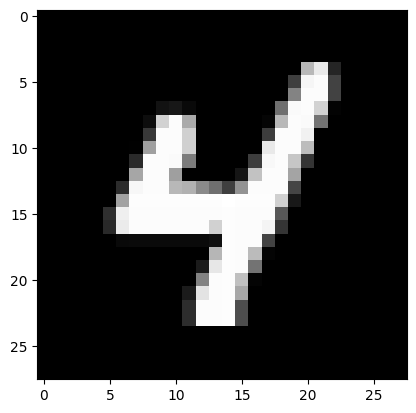

In [50]:
test() # do one to visualise 


In [51]:
testMany() # do many for accuracy calculation 

accuracy: 92.95%
